# 17 NoVax Communities Interactions - Analysis 
We want to analyse the interactions between users in novax communities of different countries, and compare them with the interactions between other users in the same countries.

We will analyse the probability that two random users in novax communities are connected with respect to two random users in other communities, that is:

$A_{ij}$ = $\frac{\delta^{A}_{ij}}{\delta^{P}_{ij}}$, where

$\delta^{A}_{ij} = \frac{\text{#edges antivax from i to j}}{\text{#pairs of antivax users between i and j}}$

$\delta^{P}_{ij} = \frac{\text{#edges provax from i to j}}{\text{#pairs of provax users between i and j}}$

$\delta^{A}_{ij}$ is the probability that two random novax users from countries i and j are connected.


In [64]:
import pandas as pd
from glob import glob
import numpy as np
import seaborn as sns
#import matplotlib.patches as mpatches
#from matplotlib.ticker import LogFormatterExponent, EngFormatter
from matplotlib.colors import SymLogNorm#, LogNorm, Normalize, , TwoSlopeNorm
#import matplotlib.dates as mdates
#from matplotlib.cm import get_cmap
#from matplotlib.ticker import PercentFormatter
#from matplotlib.patches import Rectangle
import matplotlib.pyplot as plt

In [2]:
#data on edges and users are stored in this folder
folder = "/data/public/jlenti/multilang-vax/EuropeAmerica_RTCO"

#list of all countries (size ordered)
countries = ["US", "BR", "AR", "GB", "ES", "MX", "FR", "CA", "TR", "VE", "AU", "CO", "IT", "CL", "DE",
             "PT", "IE", "PY", "EC", "RU", "UY", "NZ", "PL", "NL", "PE", "CU", "PA", "GR"]
#sorted by language
lang_sort = ["US", "IE", "GB", "CA", "NZ", "AU", "FR", "IT", "PL", "NL", "DE", "RU", "TR", 
             "BR", "PT", "GR", "AR", "ES", "MX","VE", "CO", "CL",
             "PY", "EC", "UY", "PE", "CU", "PA"]

#named periods
periods = ["period" + str(u + 1) for u in range(4)]
periods_names = ["pre-COVID", "pre-vax", "vax development", "vax rollout"]
periods_abbr = ["PC", "PV", "VD", "VR"]


In [3]:
novax_countries_retweets_full = {period: pd.read_csv("/home/jlenti/Files/novax_provax_countries_retweets_{0}.csv".format(period), index_col = 0) for period in periods}

In [16]:
novax_RT_df = pd.concat(novax_countries_retweets_full).reset_index().rename(columns = {"level_0": "period"}) \
.set_index(["country", "country_RT"]).drop("level_1", axis = 1)
novax_RT_df

period  novax_users  novax_users_RT  novax_pairs  \
country country_RT                                                      
CA      NZ          period1          373             135        50355   
        NL          period1          373             395       147335   
        CU          period1          373              78        29094   
        IT          period1          373            2769      1032837   
        IE          period1          373             243        90639   
...                     ...          ...             ...          ...   
GR      NL          period4          357            7099      2534343   
        AU          period4          357            2654       947478   
        DE          period4          357           10774      3846318   
        GB          period4          357           21357      7624449   
        IE          period4          357            2323       829311   

                    novax_retweets  provax_users  provax_users_RT  \
country country_RT                                                  
CA      NZ                      27          5854             1632   
        NL                       2          5854             1028   
        CU                       0          5854             1620   
        IT                       3          5854             2612   
        IE                      17          5854             2574   
...                            ...           ...              ...   
GR      NL                       0          6198            12813   
        AU                       6          6198            27863   
        DE                       4          6198            45707   
        GB                     118          6198            58019   
        IE                       7          6198            31260   

                    provax_pairs  provax_retweets  novax_density  \
country country_RT                                                 
CA      NZ               9553728               63       0.000536   
        NL               6017912                3       0.000014   
        CU               9483480                0       0.000000   
        IT              15290648                2       0.000003   
        IE              15068196               40       0.000188   
...                          ...              ...            ...   
GR      NL              79414974                8       0.000000   
        AU             172694874               37       0.000006   
        DE             283291986              188       0.000001   
        GB             359601762             2216       0.000015   
        IE             193749480               33       0.000008   

                    provax_density  density_ratio  
country country_RT                                 
CA      NZ            6.594284e-06      81.311783  
        NL            4.985118e-07      27.230063  
        CU            0.000000e+00            NaN  
        IT            1.307989e-07      22.206768  
        IE            2.654598e-06      70.653729  
...                            ...            ...  
GR      NL            1.007367e-07       0.000000  
        AU            2.142507e-07      29.556965  
        DE            6.636263e-07       1.567080  
        GB            6.162372e-06       2.511456  
        IE            1.703230e-07      49.557252  

[686 rows x 12 columns]

### Density RTs between users in NoVax communities vs density RTs between users in other communities

(array([1.e-10, 1.e-09, 1.e-08, 1.e-07, 1.e-06, 1.e-05, 1.e-04, 1.e-03,
        1.e-02, 1.e-01]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

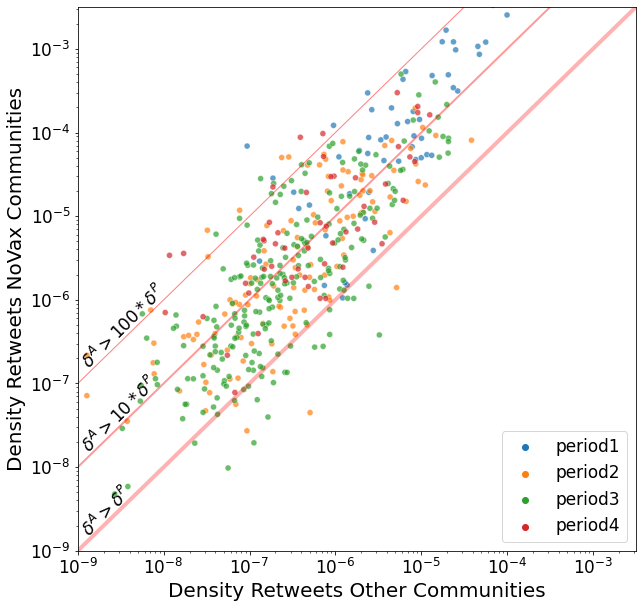

In [56]:
fig, axes = plt.subplots(1,1, figsize = [10, 10])


sns.lineplot(x = [10**-10, 10**-2], y = [10**-10, 10**-2], lw = 4, color = "red", alpha = 0.3)
sns.lineplot(x = [10**-10, 10**-2], y = [10* 10**-10, 10* 10**-2], lw = 2, color = "red", alpha = 0.4)
sns.lineplot(x = [10**-10, 10**-2], y = [100* 10**-10, 100* 10**-2], lw = 1, color = "red", alpha = 0.5)
sns.scatterplot(data = novax_RT_df, x = "provax_density", y = "novax_density", hue = "period", alpha = 0.7)

axes.text(10**-9, 150* 10**-9, "$\delta^A > 100 * \delta^P$", fontsize = 17, rotation = 45)
axes.text(10**-9, 15* 10**-9, "$\delta^A > 10 * \delta^P$", fontsize = 17, rotation = 45)
axes.text(10**-9, 1.5* 10**-9, "$\delta^A > \delta^P$", fontsize = 17, rotation = 45)
axes.set_xscale("log")
axes.set_yscale("log")
axes.set_xlim([10**-9, 10**-2.5])
axes.set_ylim([10**-9, 10**-2.5])

axes.set_xlabel("Density Retweets Other Communities", fontsize = 20)
axes.set_ylabel("Density Retweets NoVax Communities", fontsize = 20)

axes.legend(loc = "lower right", fontsize = 17)
plt.xticks(fontsize = 17)
plt.yticks(fontsize = 17)

### Density RTs between NoVax / Density RTs between Others
Here, we show, for each pairs of countries the ratio between probability of retweets between users in novax communities and probability of retweets between users in other communities.

In [65]:
class MidpointLogNorm(SymLogNorm):
    """
    Normalise the colorbar so that diverging bars work there way either side from a prescribed midpoint value)
    e.g. im=ax1.imshow(array, norm=MidpointNormalize(midpoint=0.,vmin=-100, vmax=100))

    All arguments are the same as SymLogNorm, except for midpoint    
    """
    def __init__(self, lin_thres = 10**-10, lin_scale = 10**-11, midpoint = None, vmin = None, vmax = None):
        self.midpoint = midpoint
        self.lin_thres = lin_thres
        self.lin_scale = lin_scale
        #fraction of the cmap that the linear component occupies
        self.linear_proportion = (lin_scale / (lin_scale + 1)) * 0.5
        #print(self.linear_proportion)

        SymLogNorm.__init__(self, lin_thres, lin_scale, vmin, vmax)

    def __get_value__(self, v, log_val, clip=None):
        if v < -self.lin_thres or v > self.lin_thres:
            return log_val
        
        x = [-self.lin_thres, self.midpoint, self.lin_thres]
        y = [0.5 - self.linear_proportion, 0.5, 0.5 + self.linear_proportion]
        interpol = np.interp(v, x, y)
        return interpol

    def __call__(self, value, clip=None):
        log_val = SymLogNorm.__call__(self, value)

        out = [0] * len(value)
        for i, v in enumerate(value):
            out[i] = self.__get_value__(v, log_val[i])

        return np.ma.masked_array(out)

NameError: name 'ListedColormap' is not defined

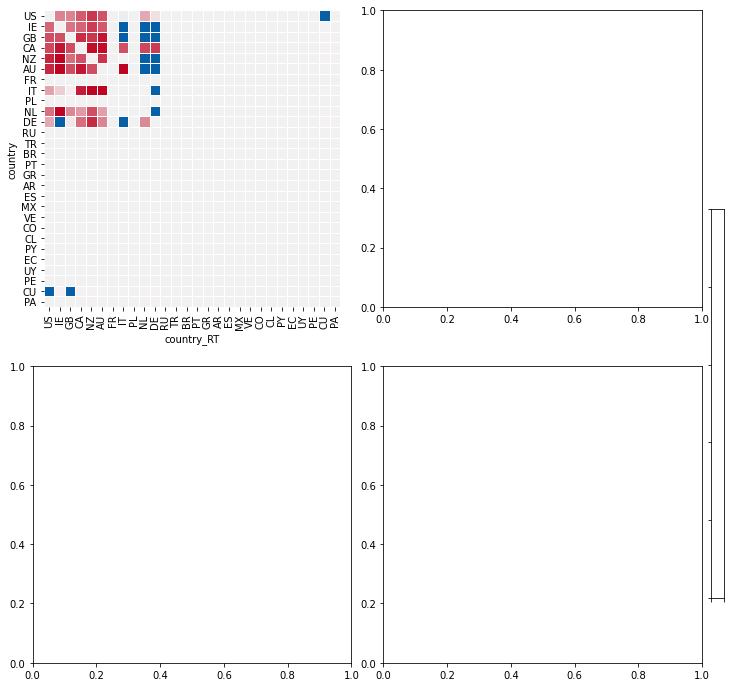

In [66]:
fig, axes = plt.subplots(nrows = 2, ncols = 2, figsize = (12, 12))#,     

fig.subplots_adjust(wspace = 0.1, hspace = 0.2)

abc_fsize = 26
supylab_fsize = 28
supxlab_fsize = 28
ylab_fsize = 24
xlab_fsize = 24
ticks_fsize = 14
cbar_fsize = 22
tit_fsize = 20

for ax, period, pname in zip(axes.ravel(), periods, periods_names):
    #i define the ratio with an epsilon to avoid divisions by zero
    data = novax_RT_df.query("period == @period") \
    .assign(density_ratio_eps = lambda x: [(u["novax_density"] + 10**-10) / (u["provax_density"] + 10**-10)
                                           for _, u in x.iterrows()])["density_ratio_eps"].unstack()
    #i want nan columns/rows for countries that don't have a novax community
    for c in lang_sort:
        if c not in data.columns:
            data[c] = np.nan
            data.loc[c] = np.nan
    
    df = data.replace([np.inf, np.nan], 0).loc[lang_sort, lang_sort]
    #i want to colour in grey all patches with nan and are not >0 values (no novax retweets)
    no_data = ((df != 0)&(~df.isna())&(~np.isinf(df)))
    #define a colourmap with extremes red and blue, centered in white
    #to colour red ratio>1 and blue ratio<1
    rdgn = sns.diverging_palette(h_neg = 250, h_pos = 10, s = 99, l = 40, 
                                 as_cmap = True, center = "light")
    #define heatmap with a logarithmic scale blue-red colourmap
    
    
    
    cbar_ax = fig.add_axes([.91, .20, .015, .45])
    cbar_ax.yaxis.set_ticklabels([])
    cbar_ax.xaxis.set_ticklabels([])
    
    cbar_ax.tick_params(labelsize = cbar_fsize) 

    sns.heatmap(df, square = True,
                cmap = rdgn, norm = MidpointLogNorm(midpoint = 10, vmin = 10**-2, vmax = 10**2),
                linewidths = 0.5, cbar = period == "period4", ax = ax, cbar_ax = cbar_ax)
    
    sns.heatmap(df, mask = df != 0,#((df != 0)&(~df.isna())&(~np.isinf(df))),
                linewidths = 0.5,
                cmap = ListedColormap(["lightgrey"]), 
                cbar = False, ax = ax, square = True)
    
    ax.set_facecolor("lightgray")
    
    ax.set_xlabel("")
    ax.set_ylabel("")
    ax.set_title(pname, fontsize = tit_fsize)



In [ ]:
fig, axes = plt.subplots(nrows = 3, ncols = 4, figsize = (25, 21))#,     

fig.subplots_adjust(wspace = 0.1, hspace = 0.1)

abc_fsize = 26
supylab_fsize = 28
supxlab_fsize = 28
ylab_fsize = 24
xlab_fsize = 24
ticks_fsize = 14
cbar_fsize = 22

for ax, period, period_name in zip(axes.ravel(), periods, periods_names):
    
    norm_adj_matrix = matrix_normalization(country_edgelists.query("period == @period")["weight"] \
                                           .unstack())
    for u in norm_adj_matrix.columns:
        norm_adj_matrix.loc[u,u] = 0
    
    cbar_ax = fig.add_axes([.91, .65, .01, .22])
    cbar_ax.yaxis.set_ticklabels([])
    cbar_ax.xaxis.set_ticklabels([])
    cbar_ax.tick_params(labelsize = cbar_fsize) 


    sns.heatmap(norm_adj_matrix.loc[lang_sort, lang_sort], 
                cmap = "YlGnBu",
                norm = LogNorm(vmax = 10, vmin = 10**-1.5),
                linewidths = 0.5, cbar = period == "period4",
                ax = ax, cbar_ax = cbar_ax, square = True)

    sns.heatmap(norm_adj_matrix.loc[lang_sort, lang_sort], 
                mask = norm_adj_matrix > 0,
                linewidths = 0.5,
                cmap = ListedColormap(["lightgrey"]),
                cbar = False, ax = ax, square = True)

    if period == "period1":
        ax.set_ylabel("Normalized RT Matrix", fontsize = ylab_fsize)
    else:
        ax.set_ylabel("")
    ax.set_xlabel("", fontsize = 20)
    ax.set_title(period_name, loc = "left", fontsize = xlab_fsize)

for ax, period in zip(axes.ravel()[4:8], periods):
        #    data = novax_countries_retweets_full[period].set_index(["country", "country_RT"])["density_ratio"].unstack()
    data = novax_countries_retweets_full[period].set_index(["country", "country_RT"]) \
    .assign(density_ratio_eps = lambda x: [(u["novax_density"] + 10**-10) / (u["provax_density"] + 10**-10)
                                           for _, u in x.iterrows()])["density_ratio_eps"].unstack()
    
    cbar_ax = fig.add_axes([.91, .39, .01, .22])
    cbar_ax.yaxis.set_ticklabels([])
    cbar_ax.xaxis.set_ticklabels([])
    cbar_ax.tick_params(labelsize = cbar_fsize) 

    for c in lang_sort:
        if c not in data.columns:
            data[c] = np.nan
            data.loc[c] = np.nan

    df = data.replace([np.inf, np.nan], 0).loc[lang_sort, lang_sort]
    no_data = ((df != 0)&(~df.isna())&(~np.isinf(df)))
    rdgn = sns.diverging_palette(h_neg = 250, h_pos = 10, s = 99, l = 40, 
                                 as_cmap = True, center = "light")
    
    sns.heatmap(df, cmap = rdgn, norm = MidpointLogNorm(midpoint = 10, vmin = 10**-2, vmax = 10**2),
                #matplotlib.colors.LogNorm(),
                linewidths = 0.5, cbar = period == "period4", ax = ax, cbar_ax = cbar_ax, square = True)
    sns.heatmap(df, mask = df != 0,#((df != 0)&(~df.isna())&(~np.isinf(df))),
                linewidths = 0.5,
                cmap = ListedColormap(["lightgrey"]), 
                cbar = False, ax = ax, square = True)
    
    ax.set_facecolor("lightgray")
    

    #ax.tick_params(axis = 'both', which = 'major', labelsize = 12)
    if period == "period1":
        ax.set_ylabel("Relative Density No-Vax RT", fontsize = xlab_fsize)
    else:
        ax.set_ylabel("")
    ax.set_xlabel("", fontsize = 22)
    ax.set_title("", loc = "left", fontsize = 2)


for ax, period in zip(axes.ravel()[8:], periods):
    #df = cross_urls_df.query("period == @period") \
    #.groupby(["user_country_code", "RT_user_country_code", "LC"]).count()["urls"] \
    #.reset_index() \
    #.rename(columns = {"user_country_code": "source", "RT_user_country_code": "target", "urls": "weight"}) \
    #.set_index(["source", "target", "LC"]) \
    #.unstack().fillna(0)["weight"] \
    #.rename(columns = {True: "LC", False: "HC"}) \
    #.assign(LC_prop = lambda x: x["LC"] / x.sum(axis = 1)) \
    #.query("HC > 10").unstack()["LC_prop"]
    #df = cross_urls_df.query("(LC)&(period == @period)").groupby(["user_country_code", "RT_user_country_code"]).count() \
    #.reset_index() \
    #.rename(columns = {"user_country_code": "source", "RT_user_country_code": "target", "urls": "weight"}) \
    #.set_index(["source", "target"])["weight"].unstack()
    
    #cbar_ax = fig.add_axes([.91, .13, .01, .22])
    #cbar_ax.yaxis.set_ticklabels([])
    #cbar_ax.xaxis.set_ticklabels([])
    
    #cbar_ax.tick_params(labelsize = cbar_fsize) 

    #for c in lang_sort:
    #    if c not in df.columns:
    #        df[c] = np.nan
    #        df.loc[c] = np.nan
            
    #df = df.loc[lang_sort, lang_sort]

    #sns.heatmap(df,
    #            norm = LogNorm(vmin = 10**-2, vmax = 10**-0.6), cmap = "Purples", ax = ax,
    #            linewidth = .5, cbar = False,# period == "period4", 
    #            cbar_ax = cbar_ax, square = True)
    
    #sns.heatmap(norm_adj_matrix.loc[lang_sort, lang_sort], 
    #            mask = df == df,
    #            linewidths = 0.5,
    #            cmap = ListedColormap(["lightgrey"]), 
    #            cbar = False, ax = ax, square = True)
    
    
    
    
    D = cross_urls_df.query("(period == @period)&(LC)") \
    .rename(columns = {"user_country_code": "country", "RT_user_country_code": "RT_country"}) \
    .groupby(["country", "RT_country"]).count().unstack()["urls"].fillna(0)
    for c in lang_sort:
        if c not in D.columns:
            D[c] = 0
        if c not in D.index:
            D.loc[c] = 0
    df = D.apply(lambda x: x / x.sum(), axis = 1).fillna(0)

    #df = cross_urls_df.query("(LC)&(period == @period)").groupby(["user_country_code", "RT_user_country_code"]).count() \
    #.reset_index() \
    #.rename(columns = {"user_country_code": "source", "RT_user_country_code": "target", "urls": "weight"}) \
    #.set_index(["source", "target"])["weight"].unstack()
    
    cbar_ax = fig.add_axes([.91, .13, .01, .22])
    cbar_ax.yaxis.set_ticklabels([])
    cbar_ax.xaxis.set_ticklabels([])
    
    cbar_ax.tick_params(labelsize = cbar_fsize) 

    for c in lang_sort:
        if D.loc[c].sum() < 10:
            df.loc[c] = np.nan
        df.loc[c,c] = np.nan
            
    df = df.loc[lang_sort, lang_sort]#.fillna(0)
    

    sns.heatmap(df, 
                norm =  LogNorm(vmin = 10**(-3), vmax = 10**(-0.01)),
                cmap = "Purples", ax = ax,
                linewidth = .5, cbar = period == "period4", cbar_ax = cbar_ax)
    
    sns.heatmap(norm_adj_matrix.loc[lang_sort, lang_sort], 
                mask = df == df,
                linewidths = 0.5,
                cmap = ListedColormap(["lightgrey"]), 
                cbar = False, ax = ax)



    

    if period == "period1":
        ax.set_ylabel("RT with LC Domains", fontsize = ylab_fsize)
    else:
        ax.set_ylabel("")
    ax.set_xlabel("")
    ax.set_title("", loc = "left")

    
    
    fig.show()


"""for ax in axes.ravel():
    for tick in ax.get_yticklabels():
        tick.font_manager.FontProperties(**{"fixed_width": True})
        tick.fontproperties(**{"stretch": 1000})
        tick.set_fontsize(ticks_fsize)
    for tick in ax.get_xticklabels():
        tick.stretch(500)
        tick.set_fontsize(ticks_fsize)
"""


fig.text(0.09, 0.88, "(a)", fontsize = abc_fsize)
fig.text(0.09, 0.62, "(b)", fontsize = abc_fsize)
fig.text(0.09, 0.36, "(c)", fontsize = abc_fsize)

#fig.tick_params(labelcolor = 'none', which = 'both', top = False, bottom = False, left = False, right = False)
fig.supxlabel("Retweeted Country", fontsize = supylab_fsize, x = 0.5, y = 0.08)
fig.supylabel("Retweeting Country", fontsize = supxlab_fsize, x = 0.07, y = 0.5)

"""
fig.savefig(plots_folder + "/heatmaps_densitynovax_normRT_LC_periods_2905.pdf", format = "pdf",
            bbox_inches = "tight", dpi = 600)
fig.savefig(plots_folder + "/heatmaps_densitynovax_normRT_LC_periods_2905.png", format = "png",
            bbox_inches = "tight", dpi = 600)
"""

fig.show()